### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import numpy as np
import sklearn
from sklearn import preprocessing

### Loading Datasets

In [2]:
real_df = pd.read_csv("cirrhosis.csv")

### columns

In [3]:
real_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [4]:
real_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
real_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
ID,1,2,3,4,5,6,7,8,9,10,...,409,410,411,412,413,414,415,416,417,418
N_Days,400,4500,1012,1925,1504,2503,1832,2466,2400,51,...,1067,1072,1119,1097,989,681,1103,1055,691,976
Status,D,C,D,D,CL,D,C,D,D,D,...,C,C,C,C,C,D,C,C,C,C
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo,Placebo,Placebo,Placebo,D-penicillamine,Placebo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,21464,20617,25594,19994,13918,24201,20284,19379,15526,25772,...,15706,14245,18628,24472,12784,24472,14245,20819,21185,19358
Sex,F,F,M,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
Ascites,Y,N,N,N,N,N,N,N,N,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,Y,Y,N,Y,Y,Y,Y,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,Y,Y,N,Y,Y,N,N,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,Y,N,S,S,N,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N


In [6]:
real_df.shape

(418, 20)

In [7]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [8]:
real_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


### checking for null values

In [9]:
real_df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

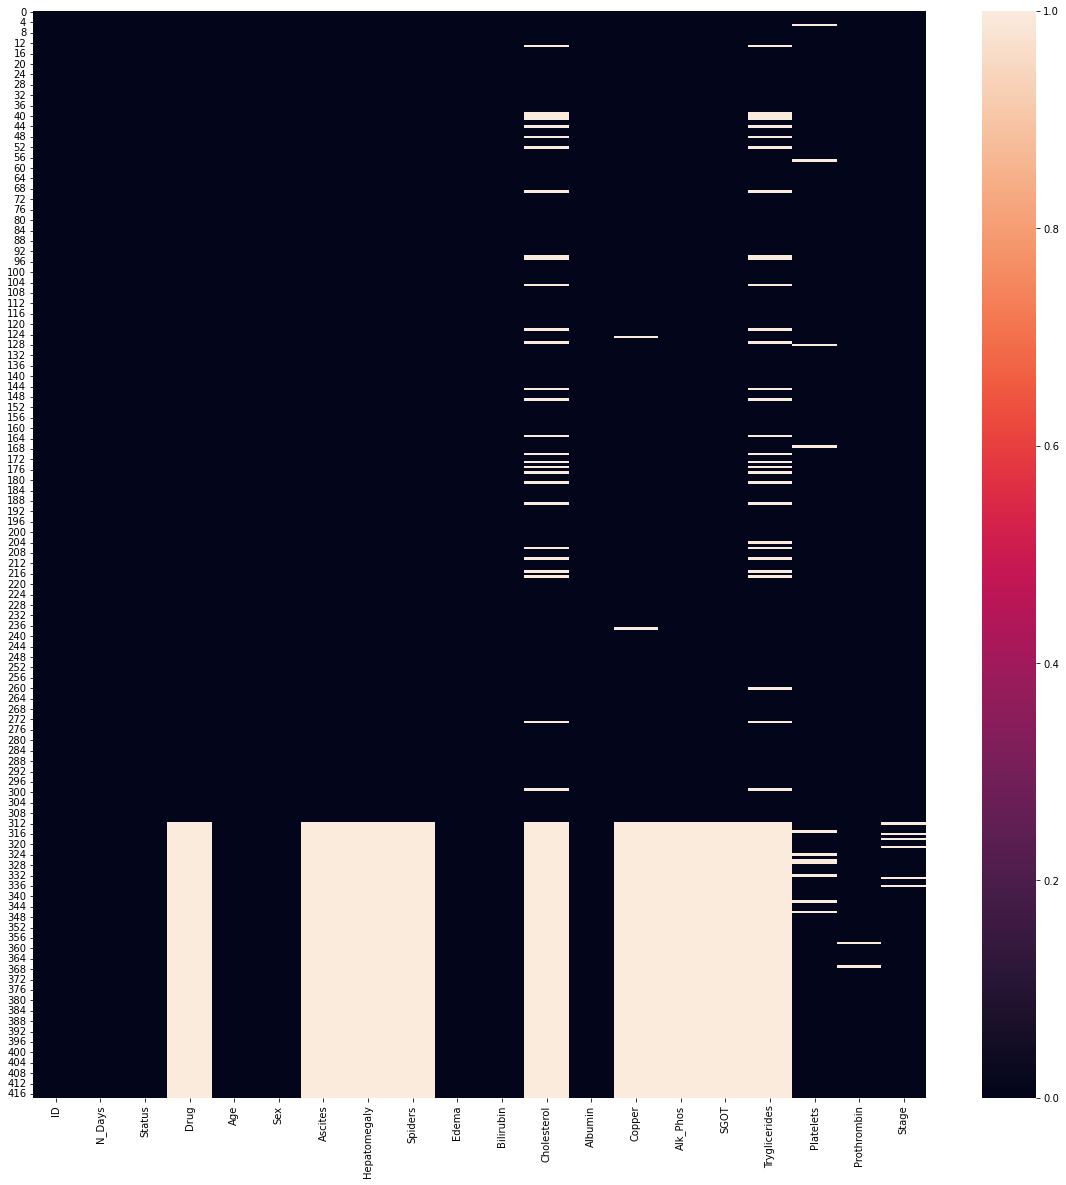

In [10]:
plt.figure(figsize=[20,20])
sns.heatmap(real_df.isnull())

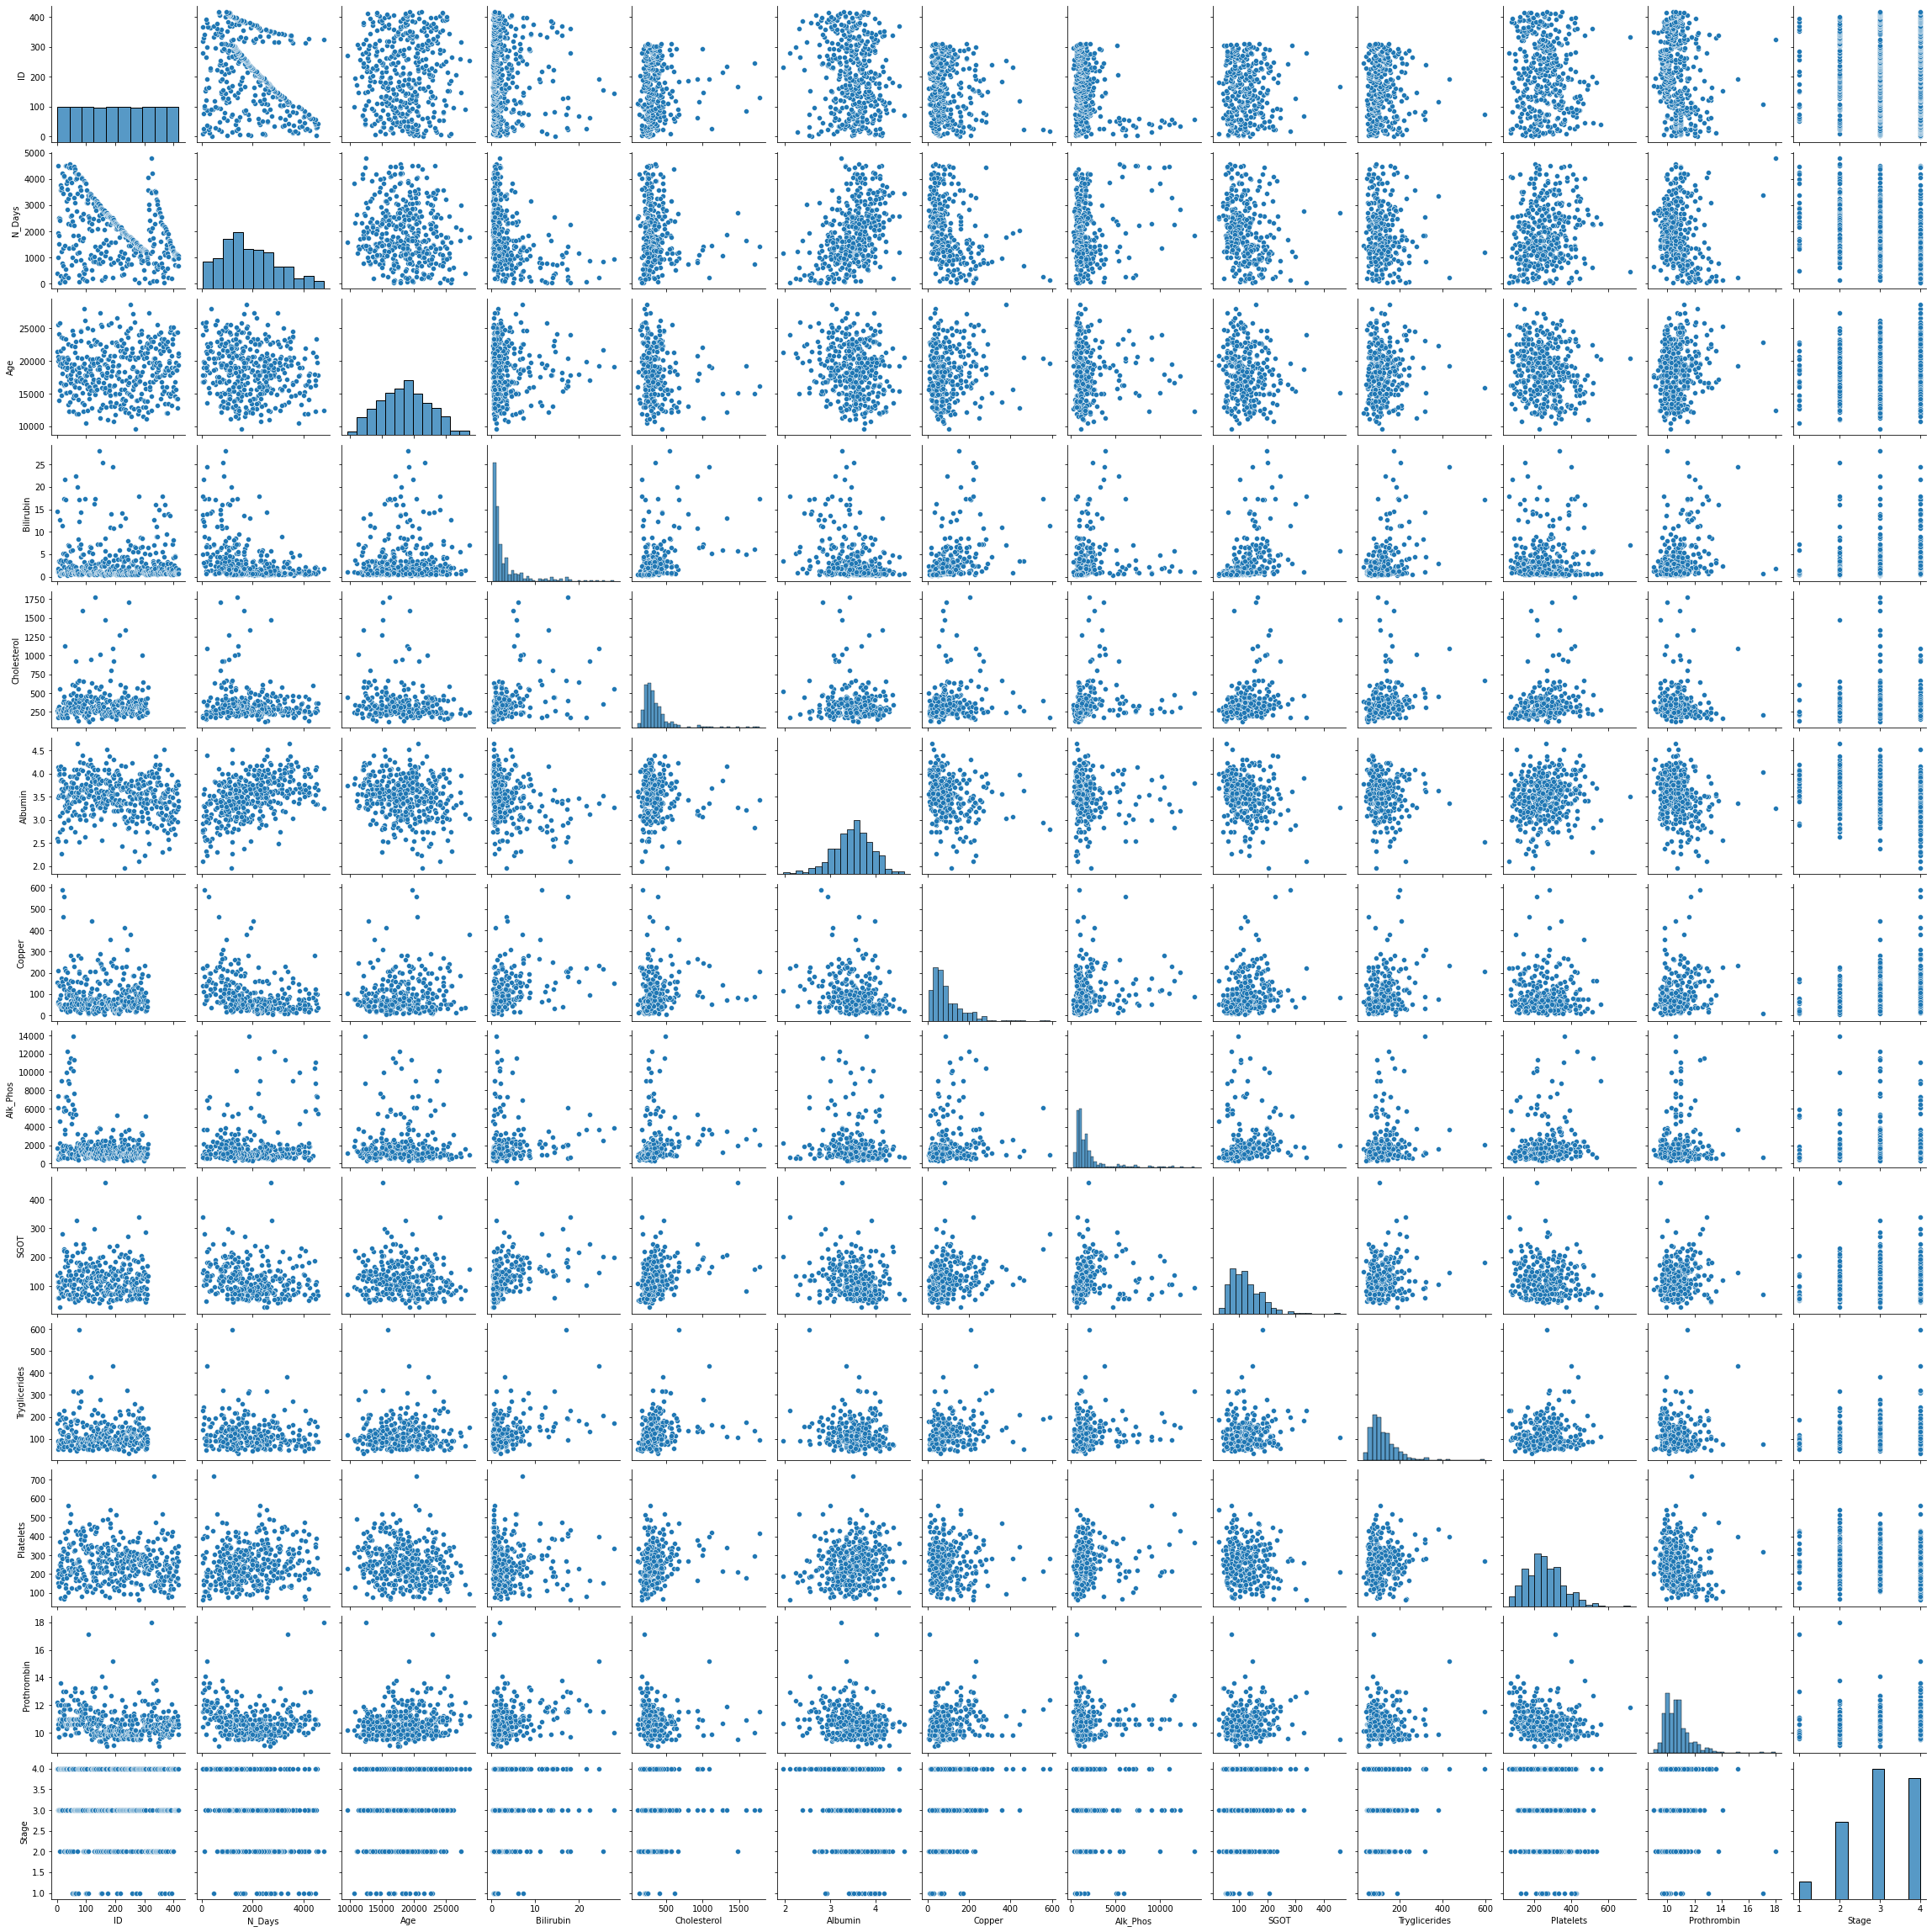

In [11]:
sns.pairplot(real_df)

### Droping the null values

In [12]:
real_df[real_df['Stage'].isnull()].index

Int64Index([312, 316, 318, 321, 333, 336], dtype='int64')

In [13]:
real_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [14]:
df1 = real_df.drop(real_df[real_df['Stage'].isnull()].index)

In [15]:
df1

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


##### df1 has now only stage column,now we have dropped the null values

In [16]:
df1.reset_index(drop=True,inplace=True)

In [17]:
df1['Stage'].isnull().sum()

0

In [18]:
df1.shape

(412, 20)

In [19]:
df1.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Finding the co relation between features and prediction class

<AxesSubplot:>

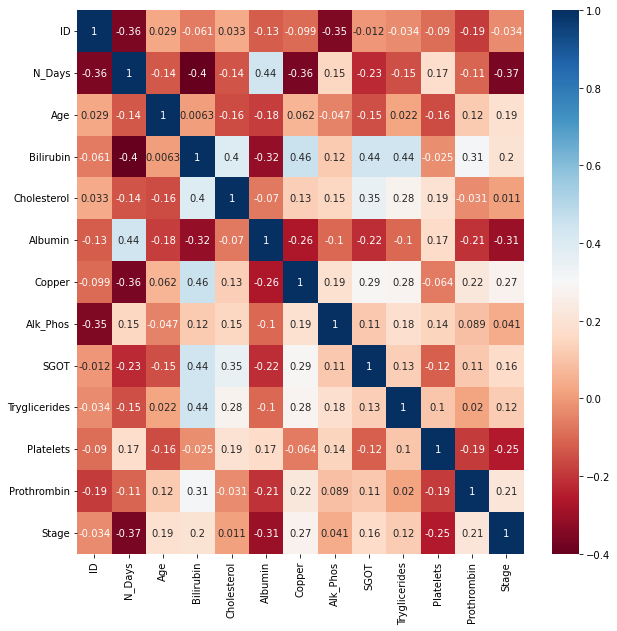

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="RdBu", annot=True)  

In [21]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

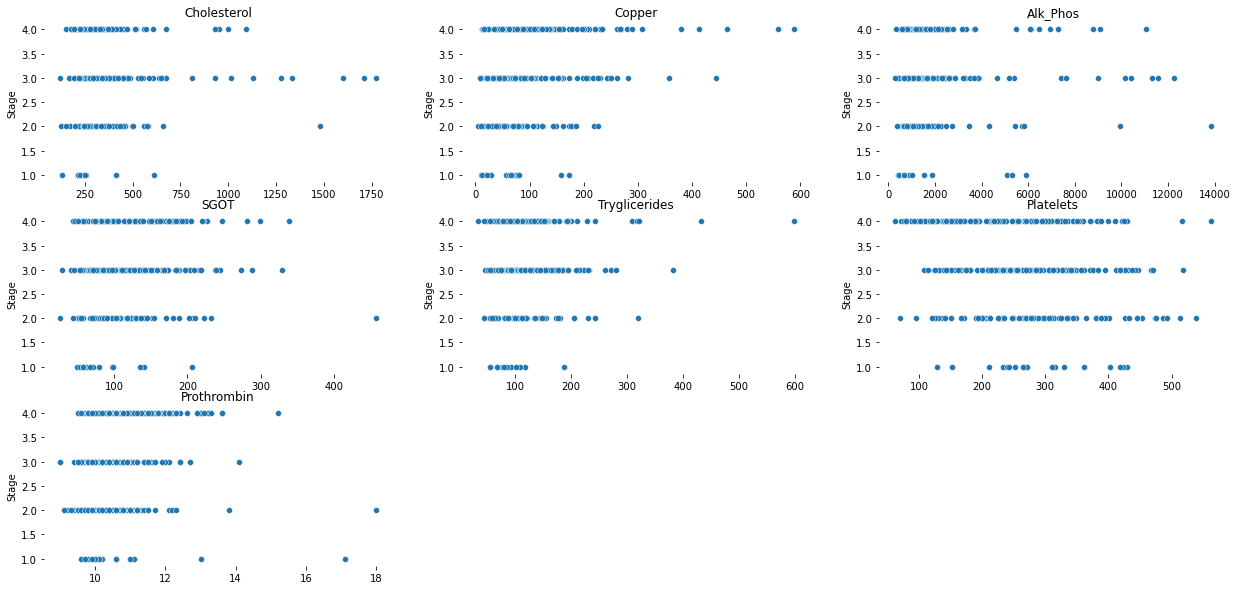

In [22]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [23]:
df2 = df1.dropna()     # lets drop all null value in the dataframe and copy it to df2
df2.shape

(276, 20)

In [24]:
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


### removing outliers

In [25]:
def max_min_collect(df,column_list):
    max_min_list = []
    for col in column_list:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1
        x=[abs(1.5 * IQR - Q1), abs(Q3 + 1.5 * IQR)]
        max_min_list.append(x)
        
    return max_min_list

In [26]:
check_normal1 = df2.groupby(['Stage']) #group by stages for df2- this grouping is done to find max and min value
stage_1_1 = check_normal1.get_group(1)
stage_2_1 = check_normal1.get_group(2)
stage_3_1 = check_normal1.get_group(3)
stage_4_1 = check_normal1.get_group(4)

In [27]:
stage_1_1

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
51,52,2386,D,D-penicillamine,18460,M,N,N,N,N,6.0,614.0,3.70,158.0,5084.4,206.40,93.0,362.0,10.6,1.0
60,61,4256,C,Placebo,16034,M,N,N,N,N,0.6,216.0,3.94,28.0,601.0,60.45,188.0,211.0,13.0,1.0
64,65,3992,C,D-penicillamine,14684,F,N,N,N,N,1.2,256.0,3.60,74.0,724.0,141.05,108.0,430.0,10.0,1.0
72,73,4190,C,Placebo,14060,F,N,N,N,N,0.7,132.0,3.60,17.0,423.0,49.60,56.0,265.0,11.0,1.0
97,98,3823,C,D-penicillamine,10550,F,N,N,N,N,1.0,239.0,3.77,77.0,1877.0,97.65,101.0,312.0,10.2,1.0
101,102,3099,C,D-penicillamine,20662,F,N,N,N,N,0.9,248.0,3.97,172.0,646.0,62.00,84.0,128.0,10.1,1.0
106,107,3388,C,Placebo,22836,F,N,N,N,N,0.6,212.0,4.03,10.0,648.0,71.30,77.0,316.0,17.1,1.0
152,153,2863,C,D-penicillamine,18118,F,N,N,N,N,0.5,217.0,3.85,68.0,453.0,54.25,68.0,270.0,11.1,1.0
205,206,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.0,4.07,12.0,5300.0,57.35,68.0,240.0,11.0,1.0
257,258,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.0,3.44,80.0,1003.0,99.00,55.0,271.0,9.6,1.0


In [28]:
list_num = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']# numerical value column list
stage_names = [stage_1_1, stage_2_1, stage_3_1, stage_4_1] 
min_max_for_all_stages = []
for i in stage_names:
    max_min_value = max_min_collect(i,list_num)
    min_max_for_all_stages.append(max_min_value)
min_max_for_all_stages  

[[[157.5, 311.5],
  [64.75, 163.25],
  [245.375, 2101.625],
  [3.82500000000001, 159.07500000000002],
  [27.5, 135.5],
  [112.375, 433.375],
  [8.462499999999999, 12.5625]],
 [[35.75, 637.75],
  [46.5, 165.5],
  [610.0, 3346.0],
  [17.91250000000001, 232.38750000000002],
  [1.0, 223.0],
  [56.75, 510.75],
  [8.700000000000003, 11.899999999999999]],
 [[10.75, 688.75],
  [67.75, 234.25],
  [788.75, 3821.25],
  [22.412499999999966, 262.68749999999994],
  [24.5, 279.5],
  [41.25, 499.25],
  [8.325000000000003, 12.524999999999999]],
 [[44.875, 573.875],
  [105.625, 333.375],
  [768.625, 3894.375],
  [15.781249999999972, 266.76874999999995],
  [6.375, 244.625],
  [61.125, 507.875],
  [8.700000000000001, 13.499999999999998]]]

In [29]:
 min_max_for_all_stages[0][0][0] 

157.5

In [30]:
check_normal = df1.groupby(['Stage']) #group the stages for df1
stage_1 = check_normal.get_group(1)
stage_2 = check_normal.get_group(2)
stage_3 = check_normal.get_group(3)
stage_4 = check_normal.get_group(4)
stage_4

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
10,11,3762,D,Placebo,19619,F,N,Y,Y,N,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,258.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,401,935,D,NaN,25202,F,NaN,NaN,NaN,N,4.2,NaN,3.19,NaN,NaN,NaN,NaN,120.0,11.1,4.0
396,403,1141,C,NaN,24107,F,NaN,NaN,NaN,N,2.5,NaN,3.33,NaN,NaN,NaN,NaN,256.0,10.8,4.0
399,406,703,D,NaN,16802,F,NaN,NaN,NaN,N,4.5,NaN,2.68,NaN,NaN,NaN,NaN,219.0,11.5,4.0
408,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0


In [31]:
stages = [stage_1,stage_2,stage_3,stage_4]

In [32]:
# df1.select_dtypes(include='object').columns
def dtype_obj_fillnull(stage_list):
    
    for stage_range in stage_list:
        
        x1 = stage_range.select_dtypes(include='object')
        x1 = x1.columns[x1.isna().any()].tolist()

        for i in x1:

            collect_null_index = stage_range[stage_range[i].isnull()].index.tolist()
            get_repeat_value = stage_range[i].mode()[0]

            for j in collect_null_index:

                df1.loc[[j],i] = get_repeat_value
            
    return df1

In [33]:
after_obj_null_correction = dtype_obj_fillnull(stages) 
after_obj_null_correction.isnull().sum() 

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [34]:
x1 = stage_4.select_dtypes(exclude='object') # this is how we have to extract the numerical null value column names
x1 = x1.columns[x1.isna().any()].tolist()
x1

['Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [35]:
def dtype_num_fillnull(stage_list):
    
    for stage_range in stage_list:
        
        x1 = stage_range.select_dtypes(exclude='object')
        x1 = x1.columns[x1.isna().any()].tolist()
        
        z=0
        
        for i in range(0,len(x1)):

            collect_null_index = stage_range[stage_range[x1[i]].isnull()].index.tolist()

            for j in collect_null_index:
                
                if i!=3: #SGOT has 2 decimal values eg:213.87 
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 1)
                else:
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 2)

                after_obj_null_correction.loc[[j],x1[i]] = get_random_value
        z+=1
            
    return after_obj_null_correction
        

In [36]:
after_num_null_correction =  dtype_num_fillnull(stages)
after_num_null_correction

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,Placebo,24472,F,N,N,N,N,1.2,263.5,2.96,80.0,1403.8,89.88,64.8,174.0,10.9,3.0
408,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,213.2,3.83,149.8,1741.6,77.27,63.1,180.0,11.2,4.0
409,416,1055,C,Placebo,20819,F,N,N,N,N,1.6,229.2,3.42,156.8,1837.8,69.49,46.8,143.0,9.9,3.0
410,417,691,C,Placebo,21185,F,N,N,N,N,0.8,307.1,3.75,99.2,505.9,147.59,98.4,269.0,10.4,3.0


In [37]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

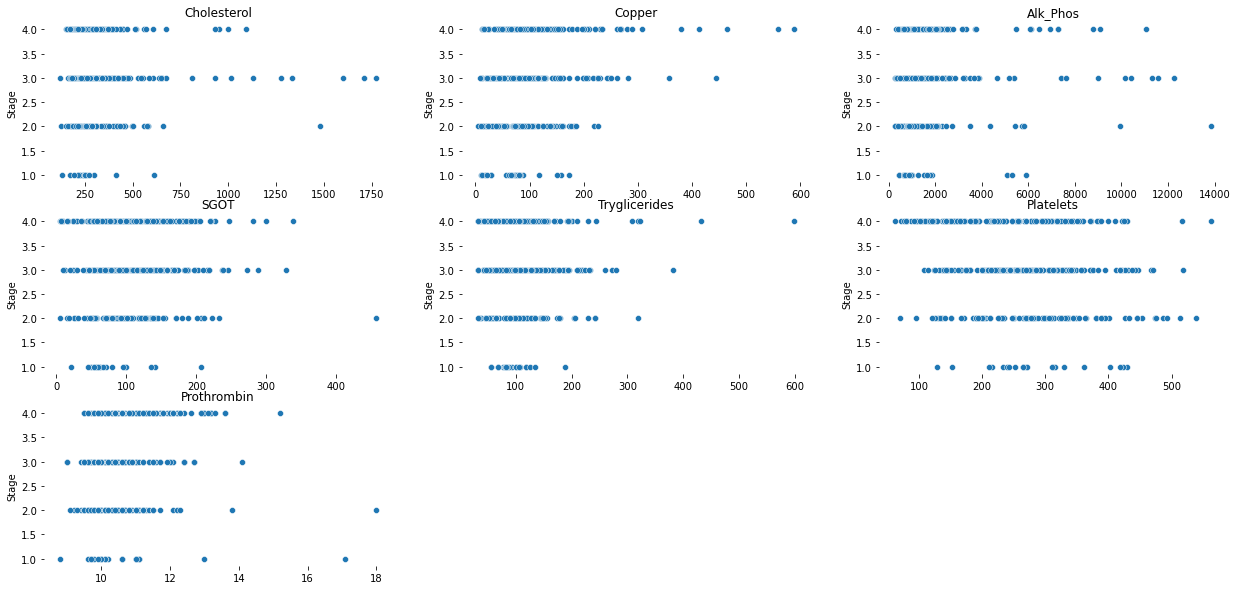

In [38]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [39]:
after_num_null_correction.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [40]:
after_num_null_correction.duplicated().sum()

0

In [41]:
after_num_null_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           412 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        412 non-null    object 
 7   Hepatomegaly   412 non-null    object 
 8   Spiders        412 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    412 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         412 non-null    float64
 14  Alk_Phos       412 non-null    float64
 15  SGOT           412 non-null    float64
 16  Tryglicerides  412 non-null    float64
 17  Platelets      412 non-null    float64
 18  Prothrombi

In [42]:
after_num_null_correction['Age'] = (after_num_null_correction['Age']/365).astype('int64') # convert age to years
after_num_null_correction

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,Placebo,67,F,N,N,N,N,1.2,263.5,2.96,80.0,1403.8,89.88,64.8,174.0,10.9,3.0
408,415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,213.2,3.83,149.8,1741.6,77.27,63.1,180.0,11.2,4.0
409,416,1055,C,Placebo,57,F,N,N,N,N,1.6,229.2,3.42,156.8,1837.8,69.49,46.8,143.0,9.9,3.0
410,417,691,C,Placebo,58,F,N,N,N,N,0.8,307.1,3.75,99.2,505.9,147.59,98.4,269.0,10.4,3.0


<AxesSubplot:>

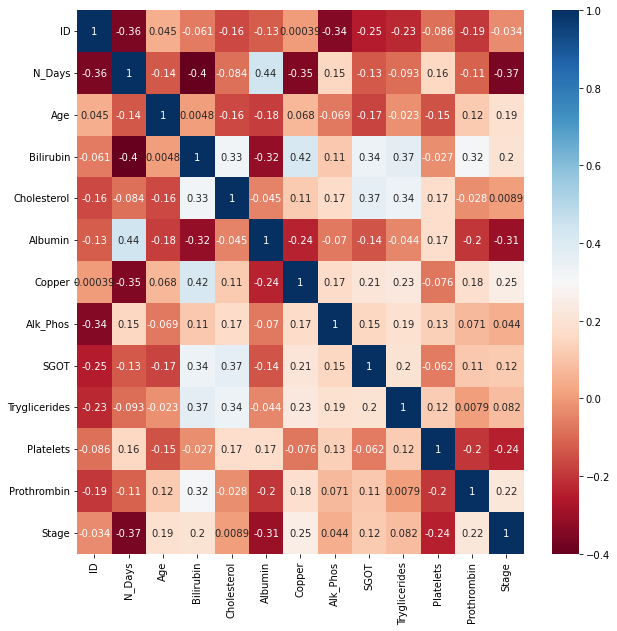

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(after_num_null_correction.corr(), cmap="RdBu", annot=True)

In [44]:
stage_corr = after_num_null_correction.corr()['Stage'][:-1]
stage_corr

ID              -0.033757
N_Days          -0.366193
Age              0.186581
Bilirubin        0.200731
Cholesterol      0.008876
Albumin         -0.305296
Copper           0.247902
Alk_Phos         0.043984
SGOT             0.115755
Tryglicerides    0.081903
Platelets       -0.243243
Prothrombin      0.217397
Name: Stage, dtype: float64

### making stage -4 as '1' and rest all stages as '0'

In [45]:
after_num_null_correction['Stage'] = np.where(after_num_null_correction['Stage'] == 4,1,0) #replace stage 4 as 1(positive) and rest of the stages in to 0(negative)

In [46]:
check_1 = after_num_null_correction.groupby(['Stage'])
check_1.get_group(0).shape

(268, 20)

<AxesSubplot:>

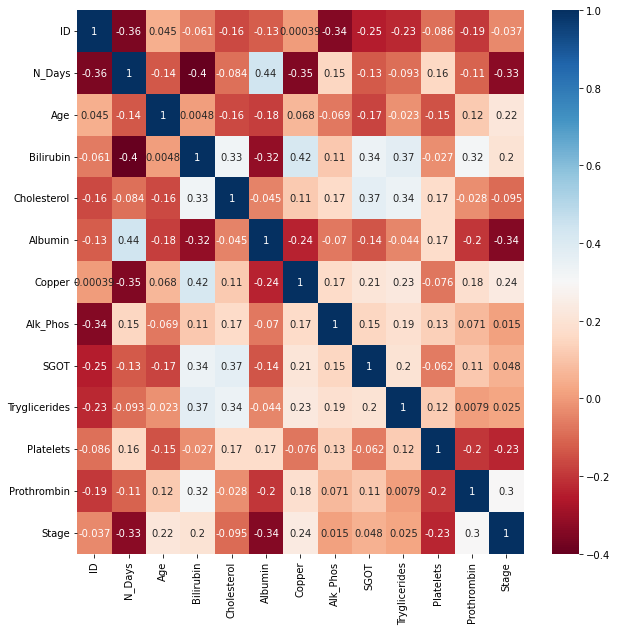

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(after_num_null_correction.corr(), cmap="RdBu", annot=True)

In [48]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

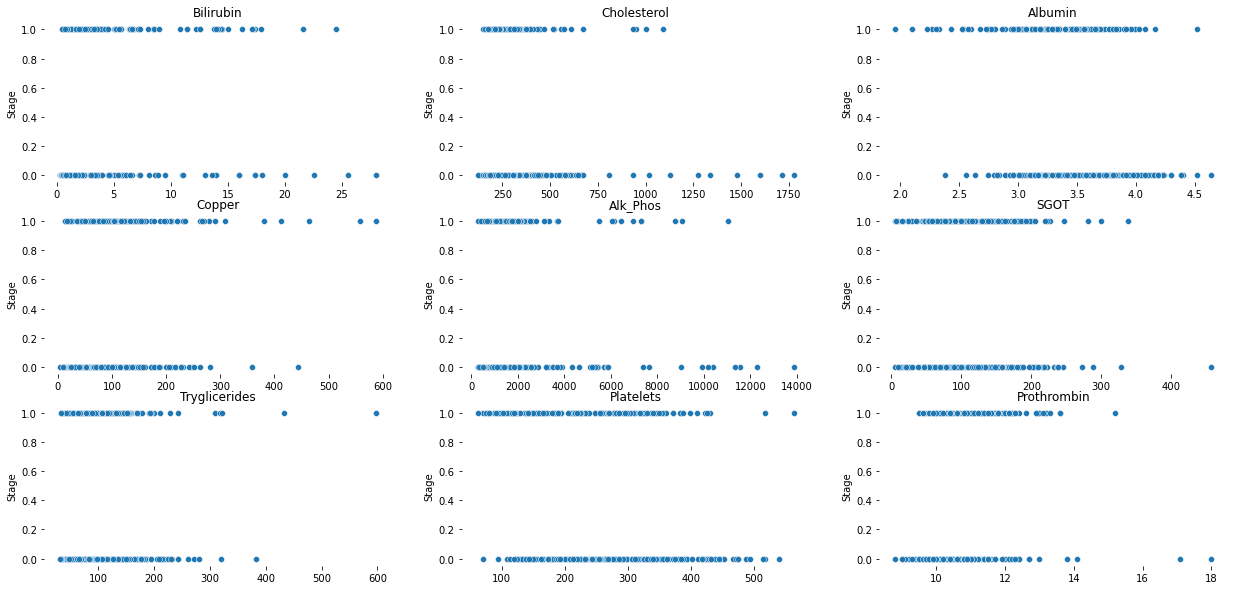

In [49]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [50]:
def plot_object(obj_col_list):
    c=1
    for i in obj_col_list:
        plt.subplot(3,2,c)
        sns.countplot(x=after_num_null_correction['Stage'], hue=after_num_null_correction[i], palette='Blues', alpha=0.9)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt
    

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

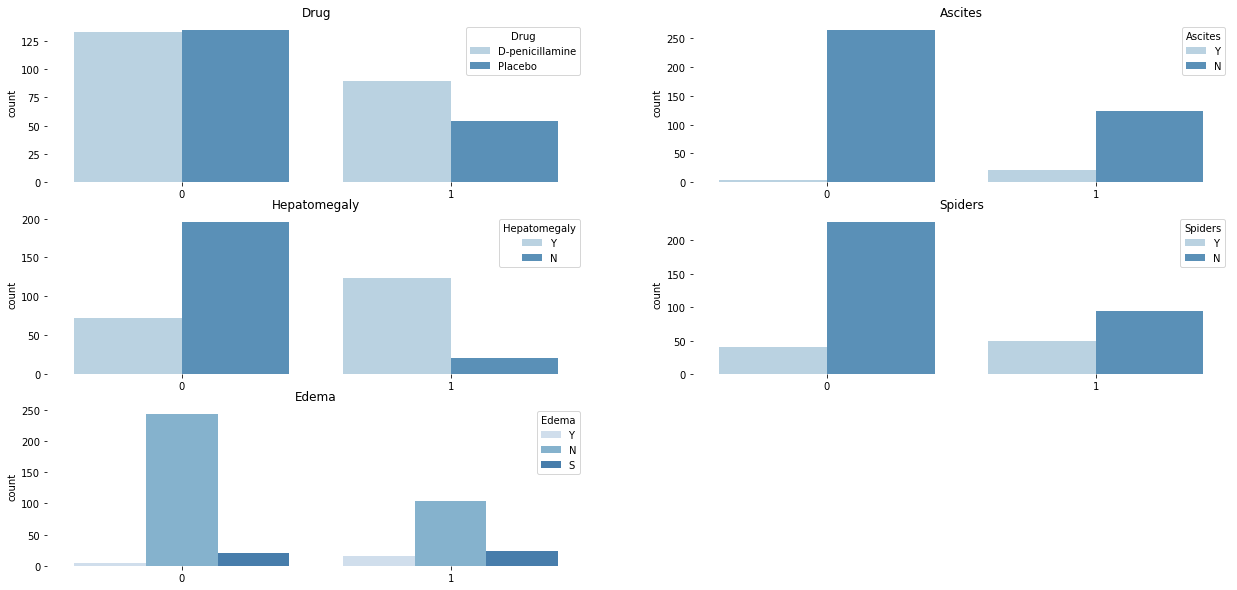

In [51]:
plt.figure(figsize=(21.2,10))
list_obj_toplot = ['Drug','Ascites','Hepatomegaly','Spiders','Edema']
plot_object(list_obj_toplot)

In [52]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.kdeplot(x=after_num_null_correction[i], hue=after_num_null_correction['Stage'], fill=True, palette='RdBu', common_norm=True)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

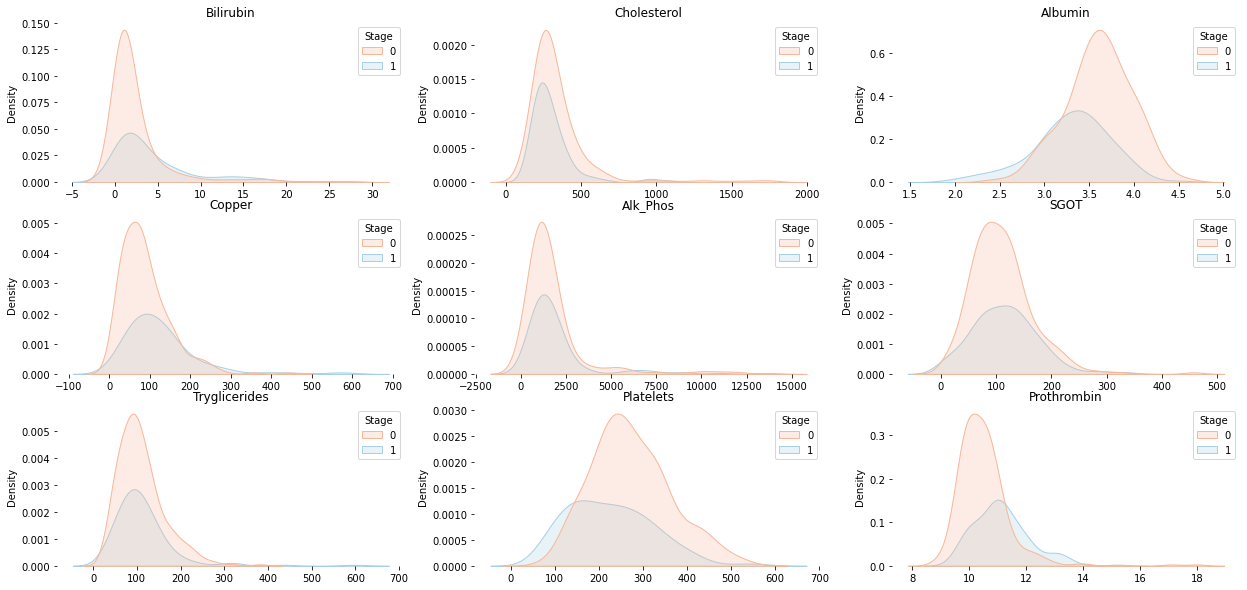

In [53]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [54]:
def plot_reg(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.regplot(x=after_num_null_correction[i], y=after_num_null_correction['Stage'], scatter=False, logistic=True, color='royalblue')
        sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/Users/kaviyagopinathan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

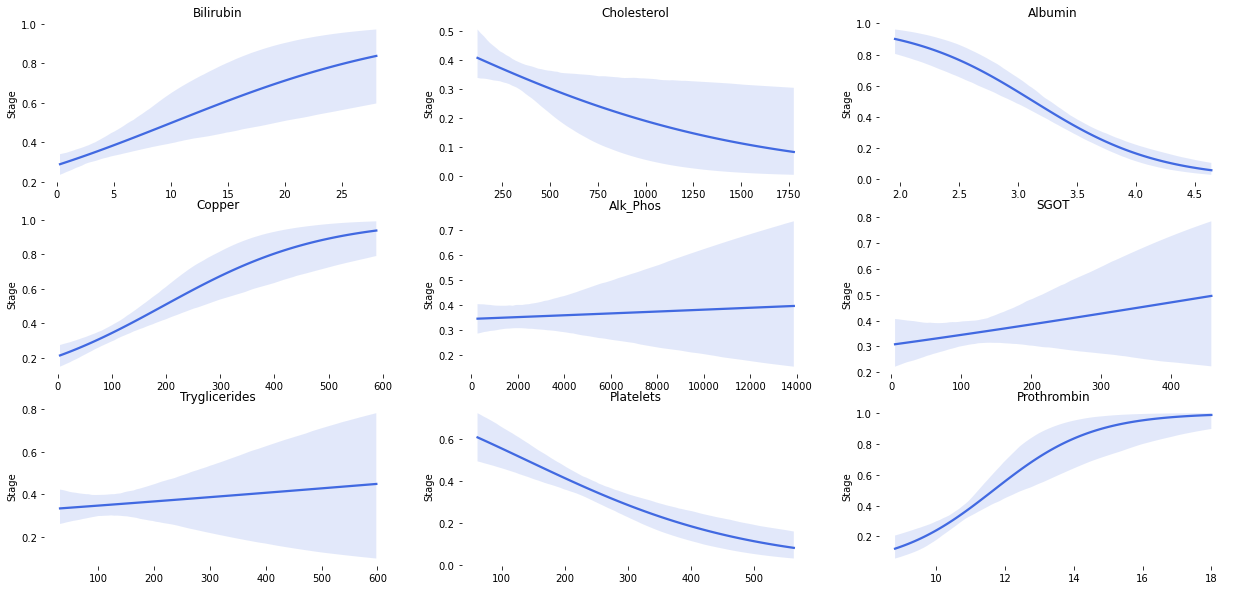

In [55]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_reg(list_num_toplot)

In [56]:
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
le = preprocessing.LabelEncoder()
for col in categorical_cols:
    after_num_null_correction[col] = le.fit_transform(after_num_null_correction[col])


# sex - female =0, male=1

#stage-4=1 , stage1,2,3-0

In [57]:
after_num_null_correction.transpose()

,0,1,2,3,4,5,6,7,8,9,...,402,403,404,405,406,407,408,409,410,411
ID,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,409.00,410.00,411.00,412.00,413.00,414.00,415.00,416.00,417.00,418.00
N_Days,400.00,4500.00,1012.00,1925.00,1504.00,2503.00,1832.00,2466.00,2400.00,51.00,...,1067.00,1072.00,1119.00,1097.00,989.00,681.00,1103.00,1055.00,691.00,976.00
Status,2.00,0.00,2.00,2.00,1.00,2.00,0.00,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
Drug,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
Age,58.00,56.00,70.00,54.00,38.00,66.00,55.00,53.00,42.00,70.00,...,43.00,39.00,51.00,67.00,35.00,67.00,39.00,57.00,58.00,53.00
Sex,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ascites,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hepatomegaly,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
Spiders,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Edema,2.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## MODEL BUILDING

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [59]:
after_num_null_correction.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [60]:
x=after_num_null_correction.iloc[:,1:19]

In [61]:
x.transpose()

,0,1,2,3,4,5,6,7,8,9,...,402,403,404,405,406,407,408,409,410,411
N_Days,400.00,4500.00,1012.00,1925.00,1504.00,2503.00,1832.00,2466.00,2400.00,51.00,...,1067.00,1072.00,1119.00,1097.00,989.00,681.00,1103.00,1055.00,691.00,976.00
Status,2.00,0.00,2.00,2.00,1.00,2.00,0.00,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
Drug,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
Age,58.00,56.00,70.00,54.00,38.00,66.00,55.00,53.00,42.00,70.00,...,43.00,39.00,51.00,67.00,35.00,67.00,39.00,57.00,58.00,53.00
Sex,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ascites,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hepatomegaly,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
Spiders,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Edema,2.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bilirubin,14.50,1.10,1.40,1.80,3.40,0.80,1.00,0.30,3.20,12.60,...,0.70,1.50,0.60,1.00,0.70,1.20,0.90,1.60,0.80,0.70


In [62]:
y=after_num_null_correction['Stage']

### Standarizing features

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Splitting the model

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [97]:
logistic_regression= LogisticRegression()

In [98]:
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [99]:
y_pred=logistic_regression.predict(x_test)

In [100]:
print (x_test)

[[-0.81452115  0.18595181 -0.9206159  ... -1.04524759 -1.89796961
   0.06777874]
 [ 0.59817892 -0.86352963 -0.9206159  ...  0.40819867  1.09946135
  -0.6133149 ]
 [-0.68435613  1.23543324  1.08622934 ... -0.3459323  -0.69899722
  -0.02952036]
 ...
 [ 0.49987247  1.23543324  1.08622934 ...  1.29853832  1.22566897
   0.26237692]
 [-1.50448677  1.23543324  1.08622934 ...  1.33175995 -0.44658199
   0.94347055]
 [-0.67980491  1.23543324 -0.9206159  ...  1.21548425 -0.30985706
   1.62456418]]


In [101]:
print (y_pred)


[1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 0 1 0 0 1 1]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

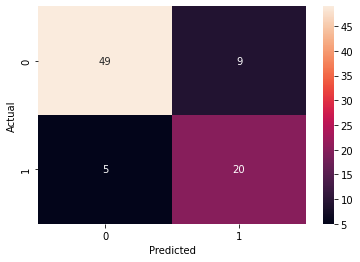

In [102]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [103]:
new_observation = [[58,0,1,1,1,2,14.5,261,2.6,156,1718,137.95,172,190,12.2,180,76,90]]

In [104]:
pred_testcase = logistic_regression.predict([[1012,2,0,70,1,0,0,0,1,1,176,3.48,210,516,96.1,55,151,12]])
pred_testcase

array([0])

In [105]:
pred_testcase2 = logistic_regression.predict(new_observation)
pred_testcase2

array([0])

In [106]:
score =(accuracy_score(y_test,y_pred))*100

In [107]:
lr_score = accuracy_score(y_test, y_pred)
lr_score

0.8313253012048193

In [108]:
print("The accuracy score of Logistic regression is ",score,"%")

The accuracy score of Logistic regression is  83.13253012048193 %


### RANDOM FOREST - CLASSIFICATION


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [110]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [112]:
acc_random_forest=(accuracy_score(y_test, y_pred))*100
print("The accuracy score of random forest classifier is ",acc_random_forest,"%")

The accuracy score of random forest classifier is  90.36144578313254 %


### Naive bayes 

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [115]:
y_pred = gnb.predict(x_test)

y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [116]:
gnb_accuracy_score = accuracy_score(y_test, y_pred)*100
gnb_accuracy_score

83.13253012048193

In [117]:
print('Model accuracy score for Naive bayes is ', gnb_accuracy_score)

Model accuracy score for Naive bayes is  83.13253012048193


In [119]:
Data = {
    'Model':['Logistic Regression', 'Random Forest', 'NaiveBayes'],
    'Accuracy':[score, acc_random_forest, gnb_accuracy_score]
}

df = pd.DataFrame(Data, index=[1, 2, 3])
df

,Model,Accuracy
1,Logistic Regression,83.132530
2,Random Forest,90.361446
3,NaiveBayes,83.132530


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

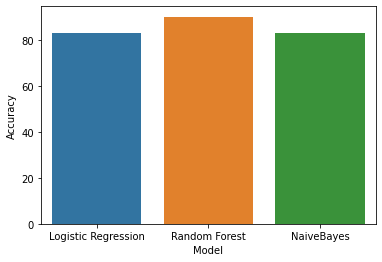

In [120]:
sns.barplot(data = df, y='Accuracy', x='Model')

In [41]:
even=[]
def even_no(x):
    for i in x :
        if(i%2==0):
            even.append(i)
    return even

x=[2,4,6]
even_no(x)


[2, 4, 6]